# Imports

In [259]:
import pandas as pd
import glob 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_colwidth', None)

# Loading Datasets

In [230]:
DATASETS_PATH = "../data/"

# customers
customers_df = pd.read_csv(DATASETS_PATH + "olist_customers_dataset.csv")
geolocation_df = pd.read_csv(DATASETS_PATH + "olist_geolocation_dataset.csv")

# order
orders_df = pd.read_csv(DATASETS_PATH + "olist_orders_dataset.csv")
order_items_df = pd.read_csv(DATASETS_PATH + "olist_order_items_dataset.csv")
order_payments_df = pd.read_csv(DATASETS_PATH + "olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv(DATASETS_PATH + "olist_order_reviews_dataset.csv")

# products
products_df = pd.read_csv(DATASETS_PATH + "olist_products_dataset.csv")
products_translation_df = pd.read_csv(DATASETS_PATH + "product_category_name_translation.csv")

# sellers
sellers_df = pd.read_csv(DATASETS_PATH + "olist_sellers_dataset.csv")

# Descriptive statistics

In [231]:
dfs = {
    "Customers": customers_df,
    "Location": geolocation_df,
    "Orders": orders_df,
    "Order Payments": order_payments_df,
    "Order Reviews": order_reviews_df,
    "Products": products_df,
    "Products Translation": products_translation_df,
    "Sellers": sellers_df
}

def dfs_basic_infos(dfs: dict):
    """
    Print basic infos of all dataframes (shape, columns, duplicated, NaN)

    Args:
        dfs (dict): pair key-value (key = "Name of the dataframe", value = "Dataframe variable")
    """
    for name, df in dfs.items():
        df_shape = df.shape
        numeric_cols = df.select_dtypes(include=np.number).columns.values
        categoric_cols = df.select_dtypes(exclude=np.number).columns.values
    
        print(20 * '-', f"Dataset {name}", 20 * '-')
        print(f"{'Shape:':<35} {df_shape}")
        print(f"{'Numerical columns:':<35} {numeric_cols}")
        print(f"{'Categorical columns:':<35} {categoric_cols}")
        print(f"{'Number of duplicated values:':<35} {df.duplicated().sum()}")
        print(f"{'Number of duplicated values (%):':<35} {round((df.duplicated().sum() / len(df)) * 100, 2)}")
        print(f"\n{'NaN values:':<35}")
        print(df.isna().sum())
        print()

def numeric_columns_statistics(dfs: dict):
    """
    Print the describe() command for all datasets

    Args:
        dfs (dict): pair key-value (key = "Name of the dataframe", value = "Dataframe variable")
    """
    for name, df in dfs.items():
        print(20 * '-', f"Dataset {name}", 20 * '-')
        print(df.describe())
        print()

def head_of_dfs(dfs: dict):
    """
    Print the describe() command for all datasets

    Args:
        dfs (dict): pair key-value (key = "Name of the dataframe", value = "Dataframe variable")
    """
    for name, df in dfs.items():
        print(20 * '-', f"Dataset {name}", 20 * '-')
        display(df.head())
        print()

## Basic Infos

In [232]:
dfs_basic_infos(dfs)

-------------------- Dataset Customers --------------------
Shape:                              (99441, 5)
Numerical columns:                  ['customer_zip_code_prefix']
Categorical columns:                ['customer_id' 'customer_unique_id' 'customer_city' 'customer_state']
Number of duplicated values:        0
Number of duplicated values (%):    0.0

NaN values:                        
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

-------------------- Dataset Location --------------------
Shape:                              (1000163, 5)
Numerical columns:                  ['geolocation_zip_code_prefix' 'geolocation_lat' 'geolocation_lng']
Categorical columns:                ['geolocation_city' 'geolocation_state']
Number of duplicated values:        261831
Number of duplicated values (%):    26.18

NaN values:                        
geolocation_zip_code_prefix    0

## Numeric Columns Statistics

In [233]:
numeric_columns_statistics(dfs)

-------------------- Dataset Customers --------------------
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

-------------------- Dataset Location --------------------
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4

## Head of dfs (first 5 rows)

In [234]:
head_of_dfs(dfs)

-------------------- Dataset Customers --------------------


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



-------------------- Dataset Location --------------------


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



-------------------- Dataset Orders --------------------


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



-------------------- Dataset Order Payments --------------------


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



-------------------- Dataset Order Reviews --------------------


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



-------------------- Dataset Products --------------------


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



-------------------- Dataset Products Translation --------------------


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor



-------------------- Dataset Sellers --------------------


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Distribution & Density

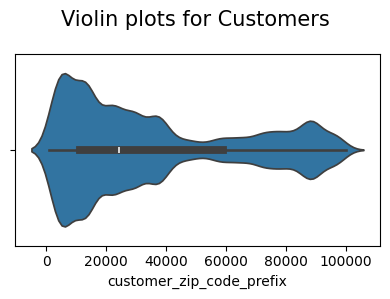

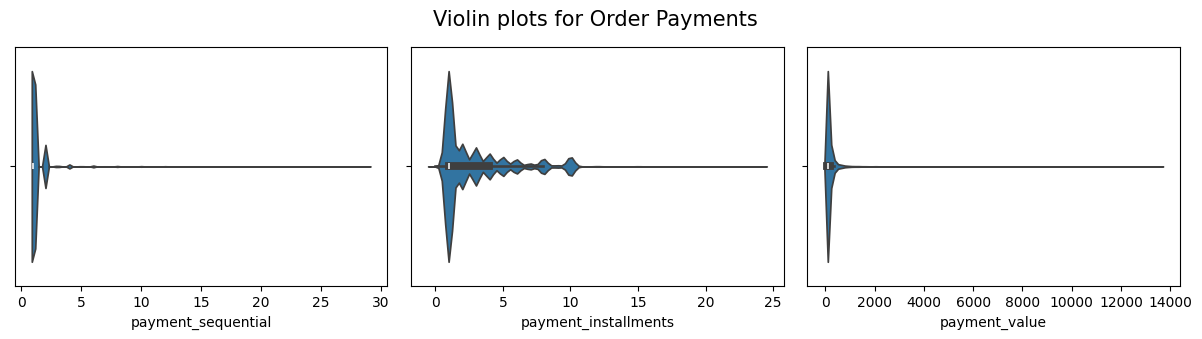

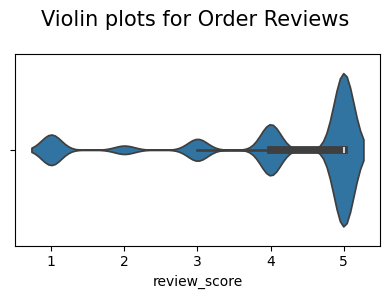

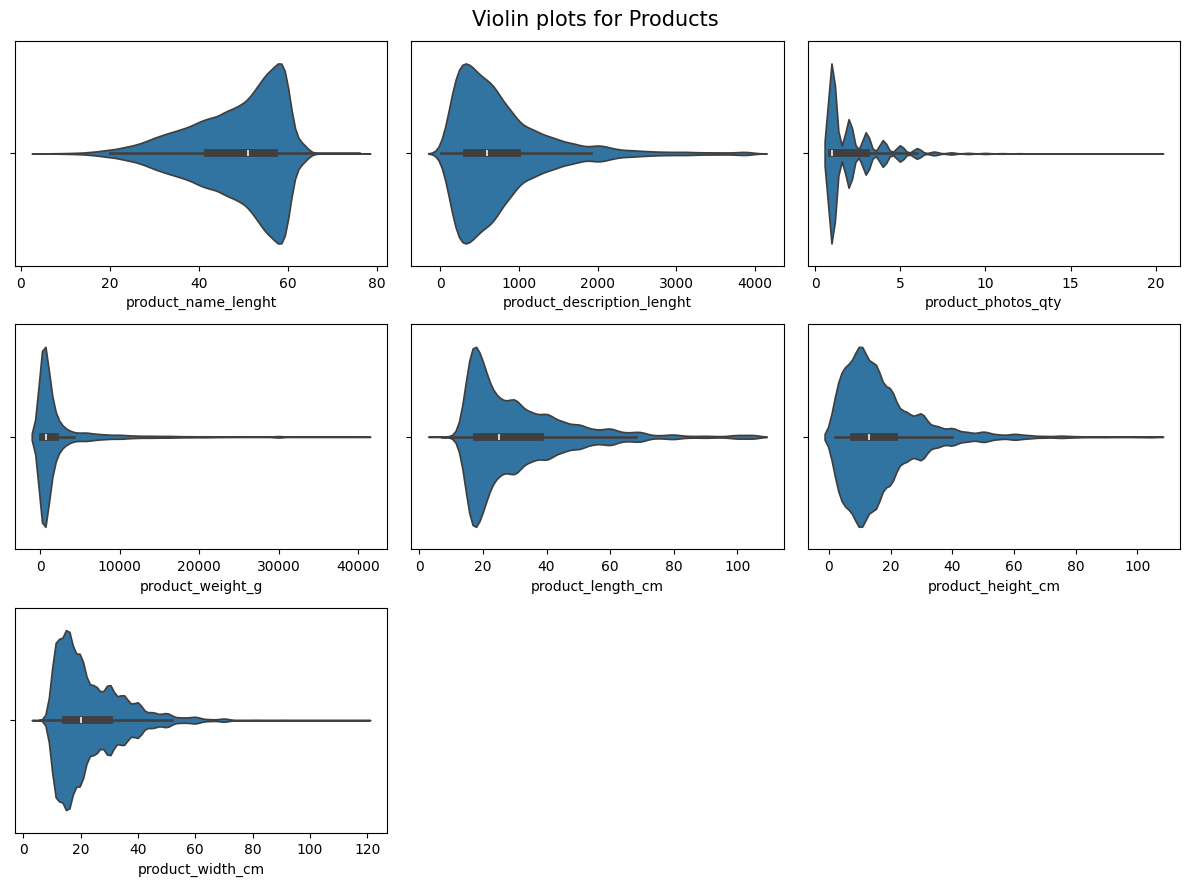

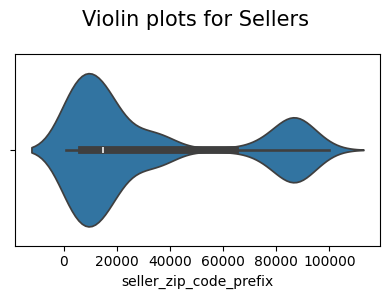

In [235]:
def visualize_violinplot(dfs: dict):
    """
    Plot violin subplots of numeric columns from all dataframes

    Args:
        dfs (dict): pair key-value (key = "Name of the dataframe", value = "Dataframe variable")
    """
    for name, df in dfs.items():
        if name == 'Location':  
            continue

        numeric_df = df.select_dtypes(include='number')
        if numeric_df.shape[1] == 0:
            continue

        num_cols = numeric_df.shape[1]
        nrows = (num_cols // 3) + 1  # // -> rounded division
        ncols = min(3, num_cols)

        # subplots for each numeric dataframe
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 3*nrows))
        fig.suptitle(f"Violin plots for {name}", fontsize=15)
        
        if isinstance(axes, plt.Axes):  
            axes = [axes]
        else:
            axes = axes.flatten()

        for i, col in enumerate(numeric_df.columns):
            sns.violinplot(data=numeric_df, 
                             x=col,
                             ax=axes[i])

        # remove empty subplots
        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

visualize_violinplot(dfs)

# Cleaning & Manipulating Datasets

In [236]:
def remove_duplicated(dfs: dict):
    """
    Remove duplicated values from all dataframes

    Args:
        dfs (dict): pair key-value (key = "Name of the dataframe", value = "Dataframe variable")
    """
    for _, df in dfs.items():
        df = df.drop_duplicates(keep='first', inplace=True)

remove_duplicated(dfs)

In [237]:
def drop_columns(df_columns:dict):
    """
    Drop selected columns from multiple dataframes

    Args:
        df_columns (dict): dict format (key = Dataframe variable, Value = Tuple with the dataframe variable and a list of columns)

    Returns:
        new_dfs (dict): a new dict with updated dataframes
    """
    new_dfs = {}
    for name, (df, columns) in df_columns.items():
        new_dfs[name] = df.drop(columns=columns, axis=1)
        
    return new_dfs 

def convert_columns_to_datetime(df:pd.DataFrame, datetime_cols:list) -> pd.DataFrame:
    """
    Convert object columns with data and time to pandas datetime

    Args:
        df (dataframe): dataframe target to convert the variables
        datetime_cols (list): list with all datetime cols to convert

    Returns:
        df (dataframe): new dataframe with columns converted
    """
    for col in datetime_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce")
    return df
 
def fillna_columns(df:pd.DataFrame, columns:list) -> pd.DataFrame:
    """
    Replace NaN values with 'Vazio'(empty)
    
    Args:
        df (pd.DataFrame): target dataframe
        columns (list): Lista de colunas onde aplicar o preenchimento

    Returns:
        pd.DataFrame: Novo DataFrame com os valores nulos substituídos
    """
    for col in columns:
        if col in df.columns:
            df[col] = df[col].fillna("Vazio")
    return df


# i decided to not use the geolocation dataset, so don't need to keep the foreign keys for this dataset
cols_to_drop = {
    "Customers": (customers_df, ['customer_zip_code_prefix']),
    "Order Reviews": (order_reviews_df, ['review_comment_title']),
    "Sellers": (sellers_df, ['seller_zip_code_prefix']),
    "Products": (products_df, ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_photos_qty', 
                               'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])
}


# dataframes after removing columns
updated_dfs = drop_columns(cols_to_drop)

customers_df = updated_dfs["Customers"]
order_reviews_df = updated_dfs["Order Reviews"]
sellers_df = updated_dfs["Sellers"]
products_df = updated_dfs["Products"]

# convert columns to datetime -> order reviews dataset
order_reviews_df = convert_columns_to_datetime(order_reviews_df, ['review_creation_date', 'review_answer_timestamp'])

# convert columns to datetime -> order reviews dataset
orders_df = convert_columns_to_datetime(orders_df, ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

# convert column to datetime -> order items dataset
order_items_df = convert_columns_to_datetime(order_items_df, ['shipping_limit_date'])

# filling NaN values of review_comment_message columns -> order reviews dataset
order_reviews_df = fillna_columns(order_reviews_df, ['review_comment_message'])

#### Mapping the english category name to products dataset

In [238]:
# 'how='left'' ensures all rows from *product_df* are kept, and matching rows from *products_translation_df* are added.
products_df = pd.merge(products_df, 
                       products_translation_df, 
                       on='product_category_name', 
                       how='left')

#### Creating codenames for sellers and products

In [239]:
def create_codename(df:pd.DataFrame, id_column:str, new_column:str) -> pd.DataFrame:
    """
    Create codenames based on a 'id' column

    Args:
        df (pd.DataFrame): target dataframe
        id_column (str): id column ('seller_id' or 'product_id')
        
    Returns:
        df (pd.Dataframe): dataframe with the new codename column
    """
    if id_column not in df.columns:
        raise ValueError(f"Column {id_column} not found in dataframe")

    prefix = "S_" if id_column == "seller_id" else "P_"
    
    df[new_column] = df[id_column].astype(str).apply(
        lambda x: prefix + x[:8]
    )
    
    return df
    
sellers_df = create_codename(sellers_df, "seller_id", "seller_codename")
products_df = create_codename(products_df, "product_id", "product_codename")

# Exploratory Data Analysis

## Which categories have the highest and lowest revenue? 

#### Merge Orders, Order Items and Products

In [240]:
# selecting only delivered orders -> valid sells
delivered_orders_df = orders_df[orders_df['order_status'] == 'delivered']

# calc of the total of each item
order_items_df['item_total'] = order_items_df['price'] + order_items_df['freight_value']

# merge Delivered Orders with Order Items
deliverdOrders_orderItems_merged = pd.merge(delivered_orders_df, 
                                   order_items_df, 
                                   on='order_id', 
                                   how='inner')
# merge with Products
deliverdOrders_orderItems_products_merged = pd.merge(deliverdOrders_orderItems_merged, 
                                       products_df, 
                                       on='product_id', 
                                       how='left')

# aggregation 
categories_revenue = deliverdOrders_orderItems_products_merged.groupby('product_category_name_english').agg(
    english_category=("product_category_name_english", "first"),
    portuguese_category=("product_category_name", "first"),
    total_revenue=("item_total", "sum")
).sort_values(by="total_revenue", ascending=False).reset_index(drop=True)

In [241]:
def top_categories_revenue_barplot(df: pd.DataFrame, x:str, y:str, figname:str):
    """
    Plots a barplot of categories by revenue

    Args:
        df (pd.DataFrame): target dataframe for data parameter
        x (str): corresponding column to the x axis
        y (str): corresponding column to the y axis
        figname (str): name of the figure to be saved
    """
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_axisbelow(True)
    sns.barplot(data=df, 
                x=x, 
                y=y, 
                palette='crest', 
                hue=f"{x}",
                ax=ax)
    
    ax.grid(True, axis='x', linestyle="dashed")
    ax.ticklabel_format(style="plain", axis="x") 
    plt.xticks(rotation=30, ha='right')
    ax.legend().set_visible(False)
    plt.xlabel('Total Revenue')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.savefig(f"../plots/{figname}.png")
    plt.show()

#### Top 10 categories with highest revenue

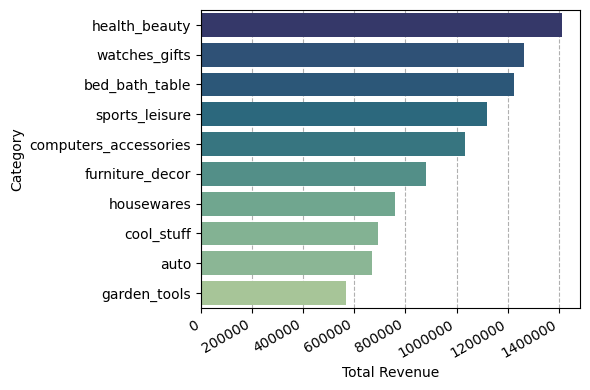

In [242]:
top_categories_revenue_barplot(categories_revenue.head(10), "total_revenue", "english_category", "top10_categories_highest_revenue")

#### Top 10 categories with lowest revenue

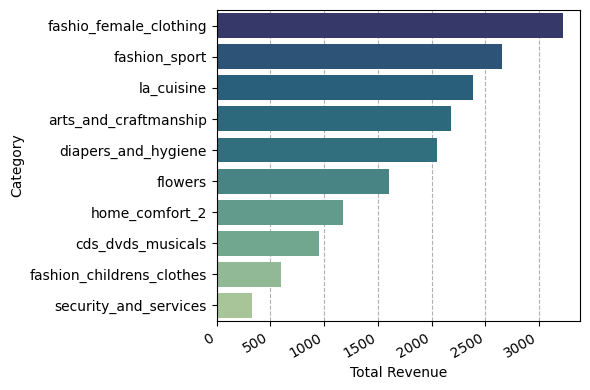

In [243]:
top_categories_revenue_barplot(categories_revenue.tail(10), "total_revenue", "english_category", "top10_categories_lowest_revenue")

## Which sellers have the highest revenue? 

#### Merge Orders, Order Items and Sellers

In [244]:
# deliverdOrders_orderItems_merged === Merge Orders with Order Items
# merge with Sellers
deliverdOrders_orderItems_sellers_merged = pd.merge(deliverdOrders_orderItems_merged, 
                                                    sellers_df, 
                                                    on="seller_id", 
                                                    how="inner")

# aggregation
sellers_revenue = deliverdOrders_orderItems_sellers_merged.groupby("seller_codename").agg(
    seller=("seller_codename", "first"),
    seller_city=("seller_city", "first"),
    seller_state=("seller_state", "first"),
    total_sales=("item_total", "sum")
).sort_values(by="total_sales", ascending=False).reset_index(drop=True)

In [245]:
def top_sellers_sales_barplot(df: pd.DataFrame, x:str, y:str, figname:str):
    """
    Plots a barplot of sellers by total of sales

    Args:
        df (pd.DataFrame): target dataframe for data parameter
        x (str): corresponding column to the x axis
        y (str): corresponding column to the y axis
        figname (str): name of the figure to be saved
    """
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_axisbelow(True)
    sns.barplot(data=df, 
                x=x, 
                y=y, 
                palette='flare', 
                hue=f"{y}",
                ax=ax)
    
    ax.grid(True, axis='y', linestyle="dashed")
    plt.xticks(rotation=30, ha='right')
    ax.legend().set_visible(False)
    plt.xlabel('Sellers')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.savefig(f"../plots/{figname}.png")
    plt.show()

#### Top 10 sellers with highest sales

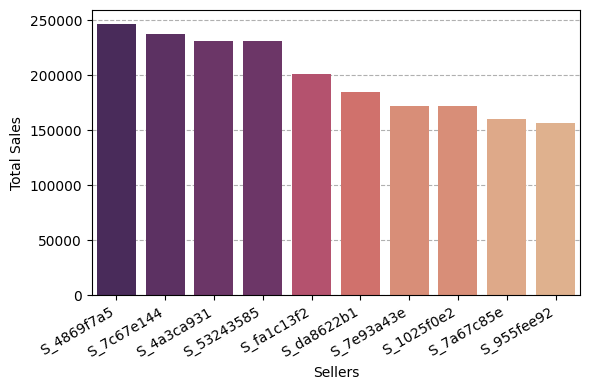

In [246]:
top_sellers_sales_barplot(sellers_revenue.head(10), "seller", "total_sales", "top_10_highest_sellers")

#### Top 10 sellers with lowest sales

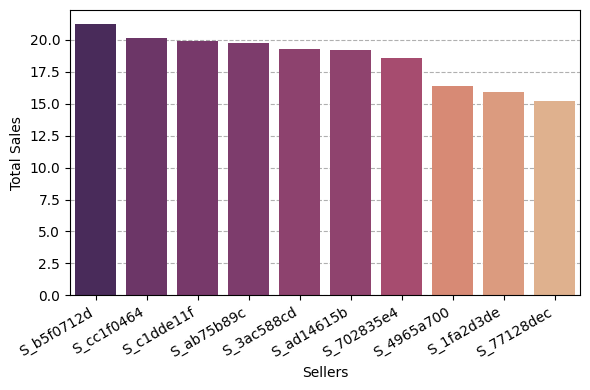

In [247]:
top_sellers_sales_barplot(sellers_revenue.tail(10), "seller", "total_sales", "top_10_lowest_sellers")

## Which cities and states have the highest revenue? 

In [248]:
# city aggregation
cities_revenue = sellers_revenue.groupby("seller_city").agg(
    seller_city=("seller_city", "first"),
    seller_state=("seller_state", "first"),
    total_revenue=("total_sales", "sum")
).sort_values(by="total_revenue", ascending=False).reset_index(drop=True)

cities_revenue["city+state"] = cities_revenue["seller_city"].str.capitalize() + ' (' + cities_revenue["seller_state"] + ')'

# state aggregation
states_revenue = sellers_revenue.groupby("seller_state").agg(
    seller_state=("seller_state", "first"),
    total_revenue=("total_sales", "sum")
).sort_values(by="total_revenue", ascending=False).reset_index(drop=True)

In [249]:
cities_revenue.head()

,seller_city,seller_state,total_revenue,city+state
0,sao paulo,SP,3096089.36,Sao paulo (SP)
1,ibitinga,SP,750317.01,Ibitinga (SP)
2,curitiba,PR,528111.48,Curitiba (PR)
3,rio de janeiro,RJ,386851.87,Rio de janeiro (RJ)
4,guarulhos,SP,364354.59,Guarulhos (SP)


#### Top 10 cities with highest sales

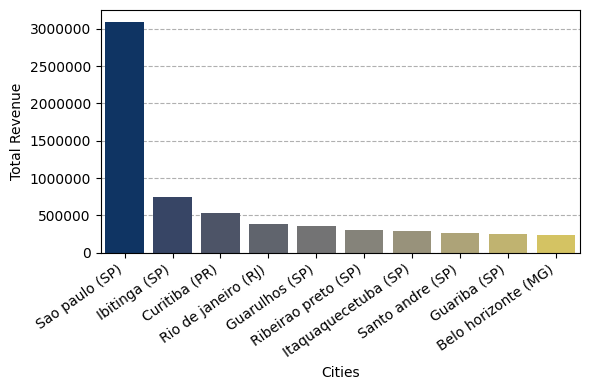

In [250]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_axisbelow(True)
sns.barplot(data=cities_revenue.head(10), 
            x="city+state", 
            y="total_revenue", 
            palette='cividis', 
            hue="city+state",
            ax=ax)

ax.grid(True, axis='y', linestyle="dashed")
plt.xticks(rotation=35, ha='right')
ax.ticklabel_format(style="plain", axis="y") 
plt.xlabel('Cities')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.savefig("../plots/top10_highest_sales_cities.png")
plt.show()

In [251]:
def top_states_sales(df: pd.DataFrame, x:str, y:str, figname:str):
    fig, ax = plt.subplots(figsize=(5,4))
    ax.set_axisbelow(True)
    sns.barplot(data=df, 
                x=x,
                y=y, 
                palette='cividis', 
                hue=f"{y}",
                ax=ax)
    
    ax.grid(True, axis='x', linestyle="dashed")
    #plt.xticks(rotation=30, ha='right')
    ax.ticklabel_format(style="plain", axis="x") 
    plt.xlabel('Total Revenue')
    plt.ylabel('State')
    plt.tight_layout()
    plt.savefig(f"../plots/{figname}.png")
    plt.show()

#### Top 12 states with highest sales

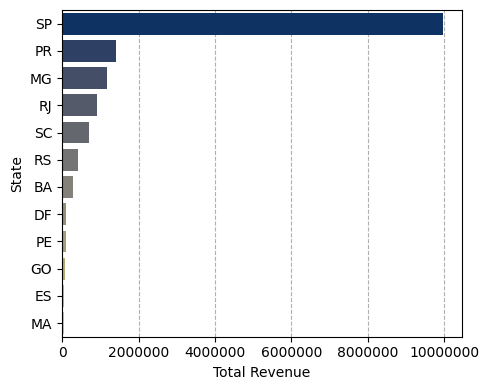

In [252]:
top_states_sales(states_revenue.head(12), "total_revenue", "seller_state", "top12_states_highest_sales")

#### Top 10 states with lowest sales

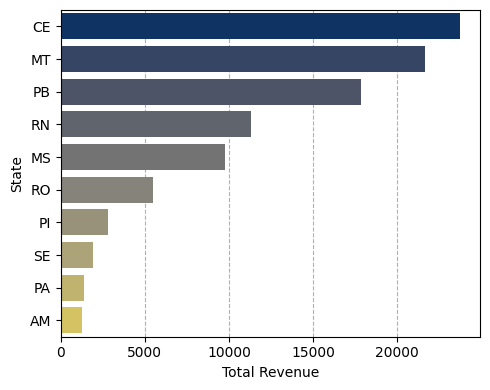

In [253]:
top_states_sales(states_revenue.tail(10), "total_revenue", "seller_state", "top12_states_highest_sales")

## Which sellers sell the same product? What are the price variations?

In [254]:
#isso pode ser um gráfico de um produto x, no eixo x, os sellers que vendem e no eixo y, o preço cobrado pelo produto

#### Merge Sellers, Order Items and Products

In [336]:
# merge sellers with order items
sellers_orderItems_merge = pd.merge(order_items_df, 
                                    sellers_df, 
                                    on="seller_id", 
                                    how="left")

# merge with products
sellers_orderItems_products_merge = pd.merge(sellers_orderItems_merge, 
                                             products_df, 
                                             on="product_id", 
                                             how="inner")

# aggregation (used to visualization)
products_sellers = sellers_orderItems_products_merge.groupby("product_codename").agg(
    product_codename=("product_codename", "unique"),
    product_category=("product_category_name_english", "first"),
    product_sellers=("seller_codename", lambda x: list(set(x))), # list of unique sellers
    num_sellers=("seller_codename", "nunique"), # count every unique seller 
    product_prices=("price", lambda x: list(x)),
    min_price=("price", "min"),
    max_price=("price", "max")
).reset_index(drop=True)

# price variation
products_sellers["price_range"] = products_sellers["max_price"] - products_sellers["min_price"]

# selecting only product that have more than one seller
products_sellers = products_sellers[products_sellers['num_sellers'] > 1].sort_values(by="num_sellers", 
                                                                                     ascending=False).reset_index(drop=True)
products_sellers.head(10)

,product_codename,product_category,product_sellers,num_sellers,product_prices,min_price,max_price,price_range
0,[P_d285360f],watches_gifts,"[S_4869f7a5, S_2eb70248, S_fa1c13f2, S_7d13fca1, S_7e93a43e, S_01ed254b, S_b33e7c55, S_d650b663]",8,"[154.91, 154.91, 155.97, 155.97, 329.0, 329.0, 279.0, 348.79, 155.97, 348.8, 348.8, 227.9, 348.8, 279.0, 259.0, 155.97, 348.8, 348.8, 260.0, 334.89, 154.91, 278.0, 348.8, 279.0, 227.9, 349.0, 348.8, 227.9, 259.0, 348.8, 339.9, 349.0, 276.0, 349.0, 155.97, 348.8, 348.8, 334.89, 275.0, 155.97, 349.99, 339.0, 155.97, 349.0, 155.97, 155.97, 254.9, 155.97, 199.9, 269.0, 349.0, 334.9, 348.8, 249.9, 194.9, 154.91, 155.97, 276.0, 194.91, 227.9, 155.97, 227.9, 199.9, 348.8, 339.0, 199.9, 298.0, 278.0, 155.97, 348.8, 348.8, 254.9, 248.0, 260.0, 348.8, 155.97, 269.0, 154.91, 299.9, 199.9, 248.0, 298.0, 348.79, 154.91, 348.8, 249.9, 348.8, 155.97, 339.0, 155.97, 154.91, 227.9, 199.9, 199.9, 295.0, 278.0, 155.97, 348.8, 155.97, 155.97, ...]",154.91,349.99,195.08
1,[P_69455f41],watches_gifts,"[S_58f1a619, S_4869f7a5, S_2eb70248, S_7d13fca1, S_7e93a43e, S_b33e7c55, S_c60b801f, S_bce6a5ec]",8,"[130.0, 136.0, 183.0, 124.0, 230.0, 180.0, 130.0, 149.0, 118.0, 139.0, 125.0, 125.0, 139.0, 255.0, 125.0, 180.0, 337.69, 139.0, 128.0, 185.0, 125.0, 110.0, 180.0, 180.0, 178.9, 110.0, 208.0, 150.0, 125.0, 124.0, 110.0, 179.0, 299.99, 110.0, 149.0, 129.0, 128.0, 180.0, 255.0, 178.9, 185.0]",110.00,337.69,227.69
2,[P_656e0eca],computers_accessories,"[S_00fc707a, S_0b90b6df, S_5f67c608, S_e9bc59e7, S_9c0e69c7, S_8e6d7754, S_6973a06f]",7,"[85.0, 85.0, 79.9, 98.9, 86.6, 65.9, 82.8, 82.8, 97.9, 97.9, 89.8, 109.9, 98.9, 93.9, 98.9, 109.9, 109.9, 89.8, 94.22, 109.9, 98.9, 98.9, 98.9, 97.79, 82.8, 98.9, 97.9, 84.0, 84.0, 87.0, 65.9, 109.9, 89.8, 89.8, 89.8, 73.0, 89.8, 89.8, 65.9, 82.8, 87.8, 93.9, 109.9, 72.99, 72.99, 81.0, 65.9, 65.9, 89.79, 89.79, 65.9, 87.8, 87.8, 109.9, 89.8, 97.79, 65.9, 65.9, 89.8, 109.9, 84.0, 86.8, 87.8, 89.8, 82.8, 94.0, 94.0, 94.0, 86.79, 109.9, 89.8, 89.8, 86.6, 89.79, 65.9, 98.9, 82.8, 87.8, 87.0, 97.79, 65.0, 84.0, 84.0, 81.0, 65.9, 109.9, 89.8, 84.0, 82.8, 89.8, 89.8, 87.8, 93.9, 97.9, 89.8, 87.0, 89.79, 82.8, 87.0, 87.0, ...]",65.00,109.90,44.90
3,[P_36f60d45],computers_accessories,"[S_f457c460, S_00fc707a, S_0b90b6df, S_229c3efb, S_88460e8e, S_8e6d7754, S_6973a06f]",7,"[88.0, 67.9, 109.89, 67.9, 88.0, 89.5, 89.15, 67.9, 89.9, 86.0, 86.0, 167.0, 67.9, 89.9, 89.49, 109.89, 89.9, 89.9, 89.5, 109.89, 88.0, 89.49, 67.9, 89.5, 89.49, 89.49, 89.9, 89.49, 89.9, 67.9, 67.9, 89.5, 67.9, 89.49, 88.0, 109.89, 89.9, 89.5, 86.0, 88.0, 67.9, 89.9, 67.9, 89.9, 89.49, 89.9, 89.49, 67.9, 89.49, 89.49, 67.9, 89.49, 89.5, 88.0, 88.0, 88.0, 67.9, 89.15, 67.9, 88.0, 89.9, 89.49, 67.9, 109.89, 67.9, 89.15, 89.5, 87.0, 89.9, 88.0, 89.49, 109.9, 89.9, 89.9, 67.9, 87.0, 78.9, 109.89, 109.89, 109.89, 109.89, 109.89, 109.89, 109.89, 109.89, 109.89, 109.89, 88.0, 89.9, 89.9, 89.15, 88.0, 88.0, 109.89, 67.9, 89.9, 89.9, 67.9, 88.0, 67.9, ...]",67.90,167.00,99.10
4,[P_4298b7e6],computers_accessories,"[S_4b5f66b7, S_3bb548e3, S_88460e8e, S_e9bc59e7, S_9c0e69c7, S_8e6d7754, S_6973a06f]",7,"[149.9, 179.9, 149.9, 149.99, 169.99, 119.5, 138.9, 138.9, 172.99, 172.99, 172.99, 172.99, 124.9, 179.9, 124.88, 147.9, 119.5, 119.5, 139.8, 124.88, 119.5, 179.9, 167.5, 149.9, 124.9, 124.9, 147.9, 120.0, 124.88, 123.9, 149.9, 149.9, 149.9, 170.9, 124.88, 149.9, 147.9, 149.9, 124.9, 134.9, 147.9, 119.0, 124.9, 124.9, 139.8, 123.0, 170.9, 149.9, 139.8, 149.9, 119.5, 119.5, 149.9, 119.5, 123.9, 139.8, 124.9, 124.88, 124.9, 149.9, 149.9, 119.5, 124.9, 124.9, 119.5, 139.9, 124.9, 170.9, 149.9, 149.9, 124.9, 149.9, 169.99, 149.99, 170.9, 124.9, 149.9, 124.88, 149.9, 149.9, 149.9, 147.9, 149.9, 149.9, 170.9, 129.9, 124.9, 123.9]",119.00,179.90,60.90
5,[P_dbb67791],computers_accessories,"[S_f457c460, S_00fc707a, S_0b90b6df, S_e9bc59e7, S_9c0e69c7, S_6973a06f]",6,"[81.99, 81.99, 81.99, 80.9, 82.0, 81.99, 82.0, 79.0, 79.0, 81.99, 81.99, 80.9, 79.0,

In [261]:
products_sellers.shape

(1225, 9)

In [362]:
def plot_sellers_by_product(df:pd.DataFrame, products_list:list, n_cols:int, figname:str):
    """
    
    """
    # list of unique products
    all_products_list = products_sellers['product_codename'].explode().unique()

    for product in products_list:
        if product not in all_products_list:
            raise ValueError(f"ERROR! Product {product} is not a valid product.")

    n_rows = (len(products_list) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for ax, product in zip(axes, products_list):
        df_product_subset = df[df['product_codename'] == product]

        sns.swarmplot(data=df_product_subset, 
                      x="seller_codename", 
                      y="price", 
                      palette="Set1", 
                      hue="seller_codename", 
                      size=6, 
                      ax=ax)
        ax.grid(True, axis="y")
        ax.set_title(f"Product {product}")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
        ax.set_xlabel("Seller")
        ax.set_ylabel("Price")

    # remove eixos vazios, se sobrarem
    for ax in axes[len(products_list):]:
        ax.remove()
        
    plt.tight_layout()
    plt.savefig(f"../plots/{figname}.png")
    plt.show()

/home/matsa/miniconda3/envs/sprint02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/matsa/miniconda3/envs/sprint02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/matsa/miniconda3/envs/sprint02/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_16375/2489292316.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
/home/matsa/miniconda3/e

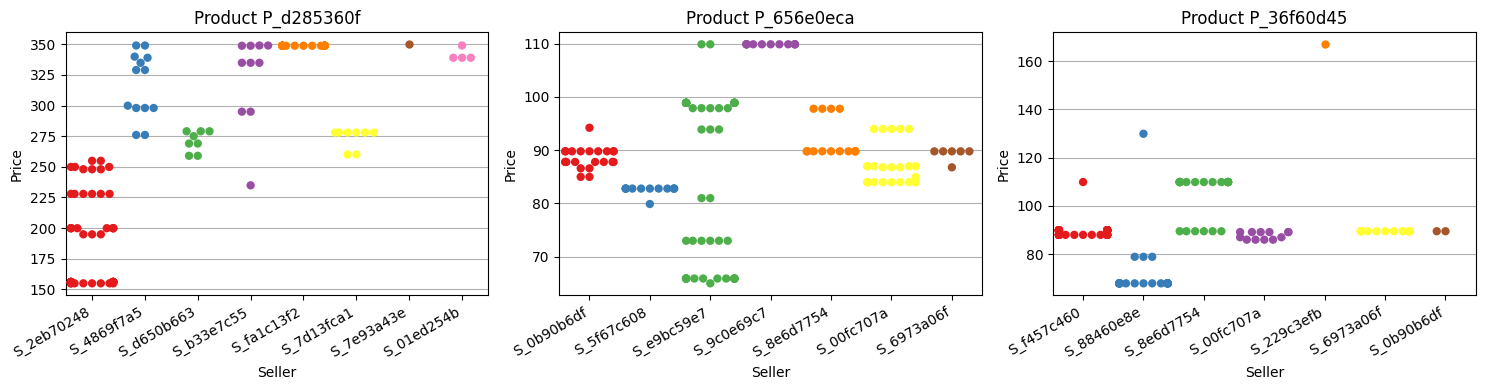

In [363]:
products_list = ["P_d285360f", "P_656e0eca", "P_36f60d45"]
plot_sellers_by_product(sellers_orderItems_products_merge, products_list, 3, "product_with_most_sellers_1")

# Top 10 melhores sellers (com mais reviews positivas)

In [ ]:
sellers_df_names = sellers_df_cleaned
sellers_df_names['seller_name'] = 'seller' + sellers_df_names['seller_id'].str[:4]

In [ ]:
sellers_df_names.head()

In [ ]:
order_items_df_cleaned.head()

- Merge de sellers e order_items

In [ ]:
merge_df4 = pd.merge(sellers_df_names, order_items_df_cleaned, on='seller_id', how='inner')
merge_df4.head()

- Merge com orders

In [ ]:
merge_df4 = pd.merge(merge_df4, orders_df_cleaned2, on='order_id', how='inner')
merge_df4.head()

- Merge com reviews (obterei apenas os produtos que possuem reviews, pois se um produto não tem review, ele não vai contribuir para a análise)

In [ ]:
merge_df4 = pd.merge(merge_df4, order_reviews_df_cleaned, on='order_id', how='inner')
merge_df4.head()

### Valores Faltantes

In [ ]:
merge_df4.isnull().sum()

### Duplicatas

In [ ]:
merge_df4.duplicated().sum()

In [ ]:
merge_df4.shape

In [ ]:
merge_df4.head(15)

In [ ]:
merge_df4.seller_name.value_counts()

**Para a minha análise, eu resolvi filtrar os sellers com um número mínimo de Reviews**

Isso para que sellers com poucos reviews não enviesem a base. Portanto, a **média bayesiana** vai ser utilizada, pois ela garante que à medida que o número de avaliações aumente, o peso das avaliações individuais cresce.

media_bayesiana = (valor_minimo_reviews * nota_media_geral) + soma_notas_seller / valor_minimo_reviews + numero_avaliacoes_sellers
                    
Eu estabeleci que valor mínimo de reviews para a análise será de **25**

In [ ]:
merge_df4.head()

In [ ]:
merge_df4.shape

**Calculando a média geral de todas as reviews**

In [ ]:
general_mean = merge_df4['review_score'].mean()
general_mean

**Valor mínimo de reviews**

In [ ]:
min_review_value = 25

**Obtendo o total dos reviews score por seller e a contagem de reviews com agrupamento**

In [ ]:
reviews_score_per_seller = merge_df4.groupby('seller_name').agg(
    review_count = ('review_score', 'count'),
    review_score_total = ('review_score', 'sum')
).reset_index()

In [ ]:
reviews_score_per_seller.head()

**Calculando a média bayesiana**

media_bayesiana = (valor_minimo_reviews * nota_media_geral) + soma_notas_seller / (valor_minimo_reviews + numero_avaliacoes_sellers)

In [ ]:
reviews_score_per_seller['bayesian_avg'] = (((min_review_value*general_mean) + reviews_score_per_seller['review_score_total']) / (min_review_value + reviews_score_per_seller['review_count'])).round(2)

In [ ]:
reviews_score_per_seller

**Ordenando pela média bayesiana**

In [ ]:
reviews_score_per_seller = reviews_score_per_seller.sort_values(by='bayesian_avg', ascending = False)

In [ ]:
reviews_score_per_seller.reset_index(drop=True)

### Exibindo em gráficos

In [ ]:
top10_best_sellers = reviews_score_per_seller.head(10)

In [ ]:
top10_worst_sellers = reviews_score_per_seller.tail(10)

**Teste de normalidade Shapiro Wilk**

Se p-value > 0,05

Ho = segue uma distribuição normal

Se p-value < 0,05

Ha = não segue uma distribuição normal

In [ ]:
import scipy.stats as stats

In [ ]:
stat, p_value = stats.shapiro(top10_best_sellers['bayesian_avg'])
print(f'stat: {stat}')
print(f'p-value: {p_value}')

**Top 10 maiores sellers não segue distribuição normal**

In [ ]:
stat, p_value = stats.shapiro(top10_worst_sellers['bayesian_avg'])
print(f'stat: {stat}')
print(f'p-value: {p_value}')

**Top 10 piores sellers não segue distribuição normal**

### Visualização através do gráfico de linhas

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x='seller_name', y='bayesian_avg', data=top10_best_sellers)
plt.title('Top 10 melhores sellers', fontsize=16)
plt.ylabel('Média bayesiana', fontsize=12)
plt.xlabel('Vendedores', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Top 10 piores sellers(com mais reviews negativas)

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x='seller_name', y='bayesian_avg', data=top10_worst_sellers)
plt.title('Top 10 melhores sellers', fontsize=16)
plt.ylabel('Média bayesiana', fontsize=12)
plt.xlabel('Vendedores', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Existe relação entre a quantidade de vendas e a quantidade de reviews para os sellers? É possível identificar aumento ou queda na venda de um seller com base nas avaliações do que já foi vendido no passado?

## Existe relação entre a quantidade de vendas e a quantidade de reviews para os sellers?

Para verificar a relação entre a quantidade de vendas e a quantidade de reviews, resolvi utilizar a **correlação linear** que é representada pelo **Coeficiente de correlação de Pearson(r)**.

Este coeficiente varia de -1 e +1.

Se **r > 0**, à medida que a quantidade de vendas aumenta, a quantidade de reviews também aumenta.<br>
Se **r < 0**, à medida que a quantidade de vendas aumenta, a quantidade de reviews tende a diminuir. <br>
Se **r = 0**, não há relação linear entre as variáveis.

### Merges

- Sellers e Order Items

In [ ]:
merge_df5 = pd.merge(sellers_df_names, order_items_df_cleaned, on='seller_id', how='inner')
merge_df5.head()

- Merge com orders

In [ ]:
merge_df5 = pd.merge(merge_df5, orders_df_cleaned2, on='order_id', how='inner')
merge_df5.head()

- Left merge com reviews para manter todos os produtos vendidos e não só os que possuem reviews

In [ ]:
merge_df5 = pd.merge(merge_df5, order_reviews_df_cleaned, on='order_id', how='left')
merge_df5.head()

In [ ]:
merge_df5.shape

### Valores nulos

In [ ]:
merge_df5.isnull().sum()

### Duplicatas

In [ ]:
merge_df5.duplicated().sum()

### Agregação para obter a quantidade de produtos vendidos e a quantidade de reviews realizadas

In [ ]:
correlation_sellers_reviews = merge_df5.groupby('seller_name').agg(
    qnty_products_sold = ('seller_name', 'count'),
    count_reviews = ('review_score', lambda x : x.notna().sum())
).reset_index()

In [ ]:
correlation_sellers_reviews.head()

Criando uma coluna para evidenciar a difereça entre produtos vendidos e reviews realizadas

In [ ]:
correlation_sellers_reviews['qnty_products_without_reviews'] = (
    correlation_sellers_reviews['qnty_products_sold'] - correlation_sellers_reviews['count_reviews']
)

Abaixo é possível observar que **poucos clientes não deixam reviews sobre o produto**

In [ ]:
correlation_sellers_reviews = correlation_sellers_reviews.sort_values(by='qnty_products_without_reviews', ascending=False).reset_index(drop=True)
correlation_sellers_reviews

### Analisando a correlação através de um scatter plot

A correlação é positiva e muito forte. Isso significa que **quanto mais produtos vendidos, maior tende a ser a quantidade de reviews recebidas.**

In [ ]:
plt.scatter(correlation_sellers_reviews.qnty_products_sold, correlation_sellers_reviews.count_reviews)
plt.title('Correlação entre a quantidade de produtos vendidos e a quantidade de reviews')
plt.xlabel('Quantidade de produtos vendidos')
plt.ylabel('Quantidade de reviews')
plt.grid(True)
plt.show()

In [ ]:
correlation = correlation_sellers_reviews['qnty_products_sold'].corr(correlation_sellers_reviews['count_reviews'], method='pearson')

In [ ]:
print(f"Correlação entre quantidade de produtos vendidos e reviews: {correlation}")

## É possível identificar aumento ou queda na venda de um seller com base nas avaliações do que já foi vendido no passado?

A minha ideia é filtrar o dataset de orders novamente, porém considerando a **data mínima anterior(min_order_date) utilizada para filtrar os últimos 12 meses, como data máxima**. Dessa forma, eu subtraio 12 meses e terei os **dados do passado**.

### Carregando o dataset novamente para evitar conflitos

In [ ]:
orders_dataset2 = pd.read_csv('/home/matsa/Documents/project_sprint02/data/olist_orders_dataset.csv')

In [ ]:
orders_dataset2.dropna(axis=0, inplace=True)

In [ ]:
orders_dataset2['order_approved_at'] = pd.to_datetime(orders_dataset2.order_approved_at)

In [ ]:
max_order_date2 = min_order_date
max_order_date2

In [ ]:
min_order_date2 = max_order_date2 - pd.DateOffset(months=12)
min_order_date2

### Pegando as datas nos intervalos definidos

In [ ]:
past_orders_df_data = orders_dataset2.loc[(orders_dataset2.order_approved_at >= min_order_date2) &
                                    (orders_dataset2.order_approved_at <= max_order_date2)]

In [ ]:
past_orders_df_data

**Data mínima**

In [ ]:
past_orders_df_data.order_approved_at.min()

**Data máxima**

In [ ]:
past_orders_df_data.order_approved_at.max()

### Excluindo colunas

In [ ]:
columns_drop = orders_dataset.columns[[3,5,6,7]]

In [ ]:
past_orders_df_data = past_orders_df_data.drop(columns=columns_drop, axis=1)

### Merges

- Seller e Order Items

In [ ]:
merge_df6 = pd.merge(sellers_df_cleaned, order_items_df_cleaned, on='seller_id', how='inner')

- Orders

In [ ]:
merge_df6 = pd.merge(merge_df6, past_orders_df_data, on='order_id', how='inner')

- Reviews

In [ ]:
merge_df6 = pd.merge(merge_df6, order_reviews_df_cleaned, on='order_id', how='left')

In [ ]:
merge_df6.head()

### Agregação para obter a quantidade de produtos vendidos e a quantidade de reviews realizadas

In [ ]:
correlation_sellers_reviews_past = merge_df6.groupby('seller_name').agg(
    qnty_products_sold = ('seller_name', 'count'),
    count_reviews = ('review_score', lambda x : x.notna().sum())
).reset_index()

Criando a coluna de quantidade de produtos sem reviews

In [ ]:
correlation_sellers_reviews_past['qnty_products_without_reviews'] = (
    correlation_sellers_reviews_past['qnty_products_sold'] - correlation_sellers_reviews_past['count_reviews']
)

In [ ]:
correlation_sellers_reviews_past = correlation_sellers_reviews_past.sort_values(by='qnty_products_without_reviews', ascending=False).reset_index(drop=True)
correlation_sellers_reviews_past

### Merge dos dataframes dos dois intervalos de tempo utilizados

In [ ]:
dates_interval_comparasion = pd.merge(correlation_sellers_reviews_past, correlation_sellers_reviews, on='seller_name', how='inner', suffixes=('_past', '_current'))

In [ ]:
dates_interval_comparasion.head()

### Ordenação da quantidade de produtos vendidos dos intervalos de tempo para cada seller

In [ ]:
dates_interval_comparasion = dates_interval_comparasion.sort_values(by=['qnty_products_sold_past', 'qnty_products_sold_current'], ascending=False).reset_index(drop=True)

In [ ]:
dates_interval_comparasion

### Visualização através do gráfico de barras

Comparação da quantidade de produtos vendidos nos intervalos de tempos dos **vendedores que mais vendem**

In [ ]:
top10_sellers = dates_interval_comparasion.head(10)

In [ ]:
top10_sellers_long = pd.melt(top10_sellers, 
                            id_vars=['seller_name'], 
                            value_vars=['qnty_products_sold_past', 'qnty_products_sold_current'],
                            var_name='period', 
                            value_name='quantity_sold')

plt.figure(figsize=(10, 6))
sns.barplot(x='seller_name', y='quantity_sold', hue='period', data=top10_sellers_long)

plt.title('Comparação de Vendas Passadas e Atuais dos 10 Maiores Vendedores')
plt.xlabel('Vendedores')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

# Houve inflação no preço dos produtos ao passar do tempo? Se houve, de quanto foi a variação desta inflação em % e em R$?

In [ ]:
order_items_dataset.head()

In [ ]:
# Excluindo colunas do Order Items não necessárias para a análise
columns_drop = order_items_dataset.columns[[3,4]]
order_items_df_cleaned2 = order_items_dataset.drop(columns=columns_drop, axis=1)
order_items_df_cleaned2.head()

In [ ]:
products_df_cleaned.head()

### Tratamento dos dataframes orders que serão utilizados

Primeiro intervalo de tempo de orders 2017-2018

In [ ]:
orders_df_cleaned.columns 

In [ ]:
# Excluindo colunas não necessárias para análise
columns_drop = orders_df_cleaned.columns[[1,2]]
current_orders_df_cleaned = orders_df_cleaned.drop(columns=columns_drop, axis=1)

In [ ]:
current_orders_df_cleaned.head()

Primeiro intervalo de tempo de orders 2016-2017

In [ ]:
past_orders_df_data.columns

In [ ]:
# Excluindo colunas não necessárias para análise
columns_drop = past_orders_df_data.columns[[1,2]]
past_orders_df_cleaned = past_orders_df_data.drop(columns=columns_drop, axis=1)

In [ ]:
past_orders_df_cleaned.head()

### Merges



#### Dataframe intervalo 2017-2018

- Products com Order Items

In [ ]:
merge_df7 = pd.merge(products_df_cleaned, order_items_df_cleaned2, on='product_id', how='inner')

- Orders

In [ ]:
merge_df7 = pd.merge(merge_df7, current_orders_df_cleaned, on='order_id', how='inner')

In [ ]:
merge_df7.head()

In [ ]:
merge_df7.shape

In [ ]:
merge_df7.duplicated().sum()

### Dataframe intervalo 2016-2017

- Products Order Items

In [ ]:
merge_df8 = pd.merge(products_df_cleaned, order_items_df_cleaned2, on='product_id', how='inner')

- Orders

In [ ]:
merge_df8 = pd.merge(merge_df8, past_orders_df_cleaned, on='order_id', how='inner')

In [ ]:
merge_df8.head()

In [ ]:
merge_df8.shape

In [ ]:
merge_df8.product_id.duplicated().sum()

In [ ]:
merge_df8.duplicated().sum()

In [ ]:
merge_df8.columns

### Agrupamentos

#### Estrutura de raciocínio

Como eu possuo 2 dataframes com intervalos de tempos diferentes, a ideia é unir eles pelo **product_id** para que os mesmos produtos possam ser comparados, em épocas diferentes.

Resolvi utilizar a **média de preços de um mesmo produto** para visualizar a variação da inflação.

Calculando a média de preços por produto no intervalo 2017-2018

In [ ]:
mean_price_2017_2018 = merge_df7.groupby(['product_id', 'product_category_name']).agg(
    mean_product_value_current = ('price', 'mean')
).reset_index()

In [ ]:
mean_price_2017_2018.head()

Calculando a média de preços por produto no intervalo 2016-2017

In [ ]:
mean_price_2016_2017 = merge_df8.groupby(['product_id', 'product_category_name']).agg(
    mean_product_value_past = ('price', 'mean')
).reset_index()

In [ ]:
mean_price_2016_2017.head()

### Merge

- Merge que une os dois períodos

In [ ]:
price_comparison = pd.merge(mean_price_2017_2018, mean_price_2016_2017, on='product_id', how='inner')

In [ ]:
price_comparison.head()

In [ ]:
price_comparison.shape

In [ ]:
price_comparison.duplicated().sum()

### Calculo das variações

A variação calculada em **Reais(R$)** é feita através da **diferença entre a média do intervalo mais recente e a média do intevalo menos recente**.

A variação calculada em **Porcentagem(%)** é uma formula padrão que utiliza a **variação de preços em Reais**, **divide pela média do intevalo menos recente** e **multiplica por 100**.

In [ ]:
price_comparison['price_variation_R$'] = price_comparison['mean_product_value_current'] - price_comparison['mean_product_value_past']
price_comparison['price_variation_%'] = (price_comparison['price_variation_R$'] / price_comparison['mean_product_value_past']) * 100

Produtos que ficaram mais caros possuem **variação de preço positiva**. Já os que ficaram mais baratos, posssuem **variação de preços negativa**.

In [ ]:
price_comparison

### Ordenação pela variação de preços

Produtos que mais inflacionaram

In [ ]:
top_increase = price_comparison.sort_values(by='price_variation_%', ascending=False).reset_index(drop=True).head(10)
top_increase['product_name'] = 'product' + top_increase['product_id'].str[:4]

In [ ]:
top_increase_sorted = top_increase.sort_values(by='price_variation_%', ascending=True)
top_increase_sorted

In [ ]:
top_decrease = price_comparison.sort_values(by='price_variation_%', ascending=True).reset_index(drop=True).head(10)
top_decrease['product_name'] = 'product' + top_increase['product_id'].str[:4]

In [ ]:
top_decrease

### Visualização gráfica de produtos com maior aumento de preço

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='price_variation_%', data=top_increase_sorted, hue='product_name', palette='Oranges')
plt.title('Top 10 Produtos com Maior Aumento de Preço (%)', fontsize=16)
plt.xlabel('Nome do produto', fontsize=12)
plt.ylabel('Variação de Preço (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In [ ]:
mean_products_values_comparision = pd.melt(
    top_increase, 
    id_vars=['product_name'], 
    value_vars=['mean_product_value_past', 'mean_product_value_current'],
    var_name='period', 
    value_name='mean_price'
)

plt.figure(figsize=(12, 8))
sns.barplot(x='product_name', y='mean_price', hue='period', data=mean_products_values_comparision,palette='Set2')

plt.title('Comparação da Média de Valores dos Produtos por Período', fontsize=16, pad=20)
plt.xlabel('Produtos', fontsize=12)
plt.ylabel('Preço Médio (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.legend(title='Período', title_fontsize=12, fontsize=10, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(X, y, 'o-', label='Preços Observados')  # Dados reais
plt.plot(future_months, future_predictions, 'x--', label='Previsão de Preços')  # Previsões
plt.xlabel('Tempo (Meses)')
plt.ylabel('Mediana dos Preços')
plt.title(f'Previsão de Preços para: {product_name}')
plt.legend()
plt.show()

# Análise de Produtos com Maior Diferença de Preço entre Vendas

Verificar quais produtos apresentam uma grande variação de preço nas vendas.

In [ ]:
merge_df8.head()

In [ ]:
merge_df8.shape

In [ ]:
merge_df8.dtypes

### Agrupamento 

Agrupamento de product_id com com preço, obtendo o mínimo e máximo

In [ ]:
price_range = merge_df8

In [ ]:
price_range = price_range.groupby('product_id')['price'].agg(['max', 'min']).reset_index()

In [ ]:
price_range.head()

In [ ]:
price_range['product_name'] = 'product' + price_range['product_id'].str[:4]

In [ ]:
price_range['price_diff'] = price_range['max'] - price_range['min']
price_range = price_range.sort_values(by='price_diff', ascending=False)

In [ ]:
top_price_range_products = price_range.head(10)

In [ ]:
top_price_range_products.head()

In [ ]:
sns.barplot(x='price_diff', y='product_name', data=top_price_range_products, palette='coolwarm', hue='product_name')
plt.title('Top 10 Produtos com Maior Diferença de Preço')
plt.xlabel('Diferença de Preço(R$)', fontsize=12)
plt.ylabel('Nome do produto', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()